# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 12.7 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2025.3.1 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.25.2 which is incompatible.
blosc2 3.3.2 requires numpy

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/foodhub_order.csv')

In [ ]:
print(df.head(10))

   order_id  customer_id            restaurant_name   cuisine_type  \
0   1477147       337525                    Hangawi         Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya       Japanese   
2   1477070        66393                Cafe Habana        Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken       American   
4   1478249        76942           Dirty Bird to Go       American   
5   1477224       147468           Tamarind TriBeCa         Indian   
6   1477894       157711          The Meatball Shop        Italian   
7   1477859        89574                  Barbounia  Mediterranean   
8   1477174       121706         Anjappar Chettinad         Indian   
9   1477311        39705              Bukhara Grill         Indian   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2      

Hello

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
df.shape

(1898, 9)

#### Observations: 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
None


#### Observations: Float64, Int64, object


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
null_counts = df.isnull().sum()
print(null_counts)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
revenue                  0
total_time               0
dtype: int64


#### Observations: There are no missing values in the data.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
df['cost_of_the_order'].describe()


,cost_of_the_order
count,1898.000000
mean,16.498851
std,7.483812
min,4.470000
25%,12.080000
50%,14.140000
75%,22.297500
max,35.410000


#### Observations:



*   Min     : 20 minutes
*   Average : 27.37 minutes
*   Max     : 35 minutes








### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
not_rated_count = (df['rating'] == 'Not given').sum()

print(f"Number of orders not rated: {not_rated_count}")

Number of orders not rated: 736


#### Observations: There were 736 orders labeled as "not given" in the data.


### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

**Order ID**

In [ ]:
df['order_id'].nunique()


1898

**Customer ID**

In [ ]:
df['customer_id'].nunique()

1200

**Restaurant Name**

In [ ]:
df['restaurant_name'].nunique()

178

**Cuisine Type**

In [ ]:
df['cuisine_type'].nunique()

14

<ipython-input-15-afd65c26e258>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'cuisine_type', order = df['cuisine_type'].value_counts().index, palette = 'pastel', edgecolor = 'black')


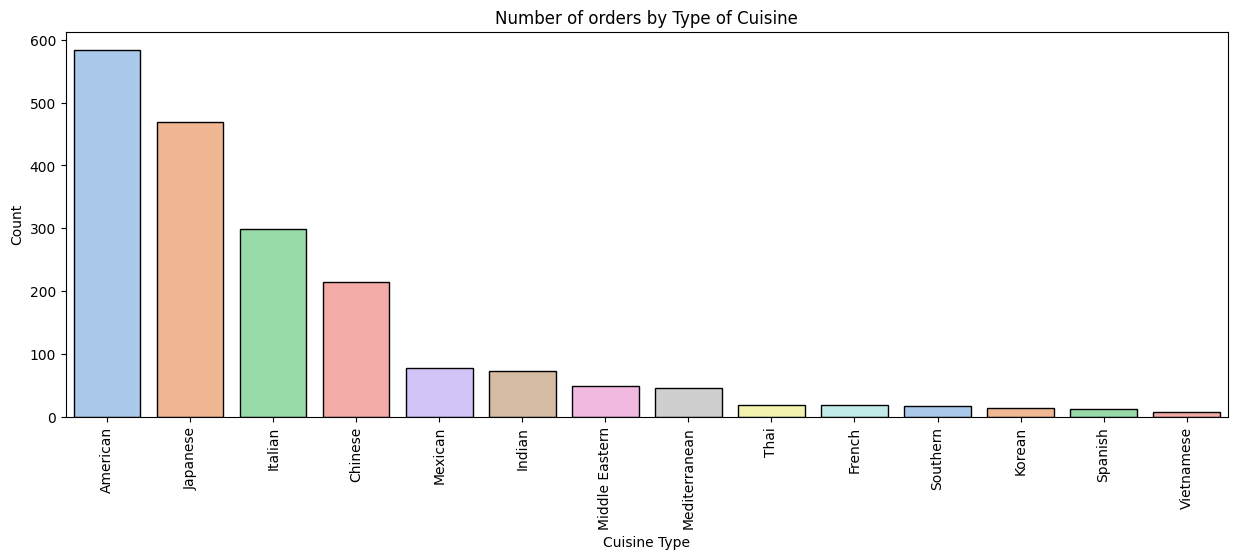

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type', order = df['cuisine_type'].value_counts().index, palette = 'pastel', edgecolor = 'black')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.title('Number of orders by Type of Cuisine')
plt.xticks(rotation = 90)
plt.show()

**Cost of Order**

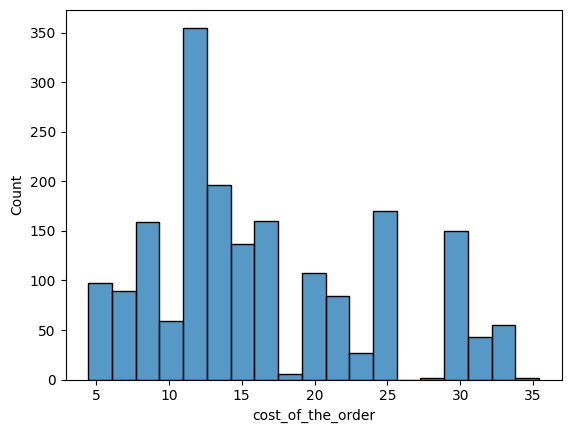

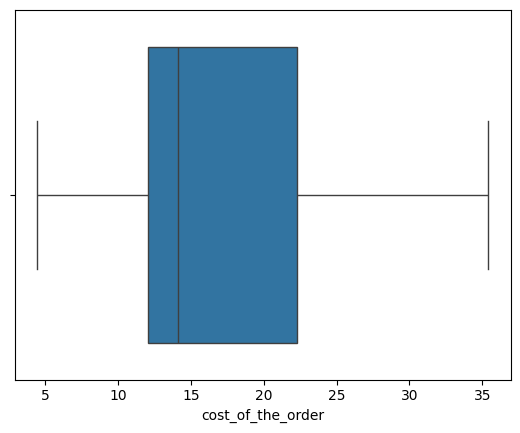

In [ ]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()

**Order by Day of the Week**

<ipython-input-17-80ca532c137e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'day_of_the_week', order = df['day_of_the_week'].value_counts().index, palette = 'pastel', edgecolor = 'black')


Text(0.5, 1.0, 'Number of orders by Day of the Week')

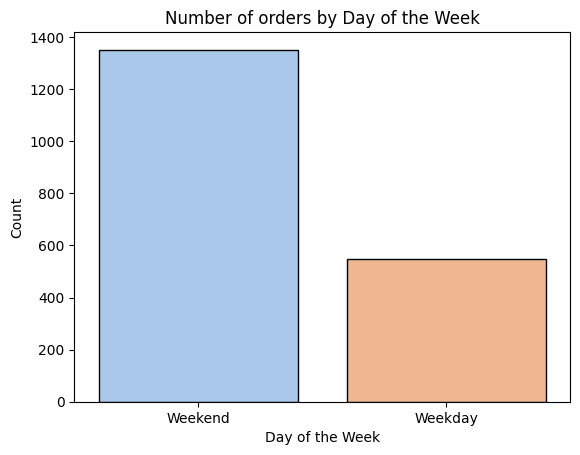

In [ ]:
df['day_of_the_week'].unique()
sns.countplot(data = df, x = 'day_of_the_week', order = df['day_of_the_week'].value_counts().index, palette = 'pastel', edgecolor = 'black')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Number of orders by Day of the Week')

**Ratings**

<ipython-input-18-1578d2c6052e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'rating', order = df['rating'].value_counts().index, palette = 'pastel', edgecolor = 'black')


<Axes: xlabel='rating', ylabel='count'>

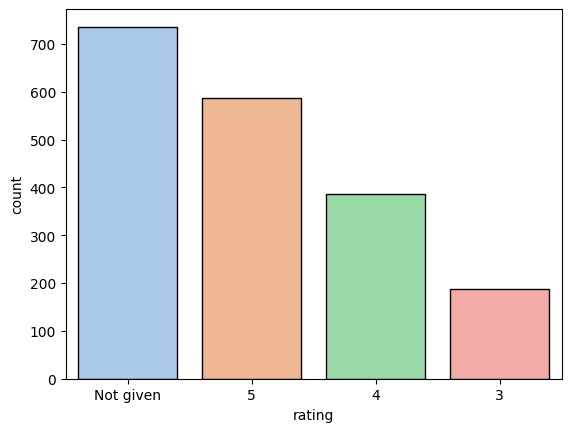

In [ ]:
df['rating'].unique()
sns.countplot(data = df, x = 'rating', order = df['rating'].value_counts().index, palette = 'pastel', edgecolor = 'black')

Food Preparation Time

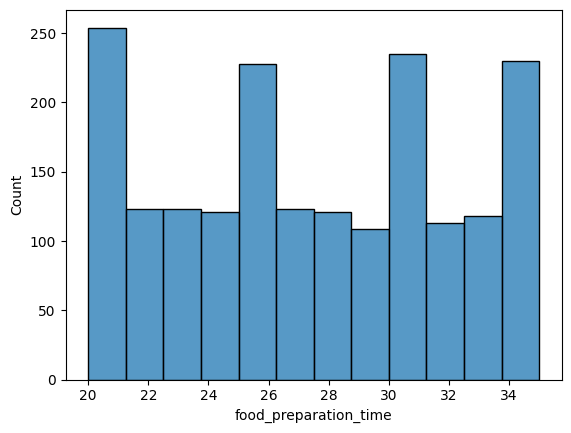

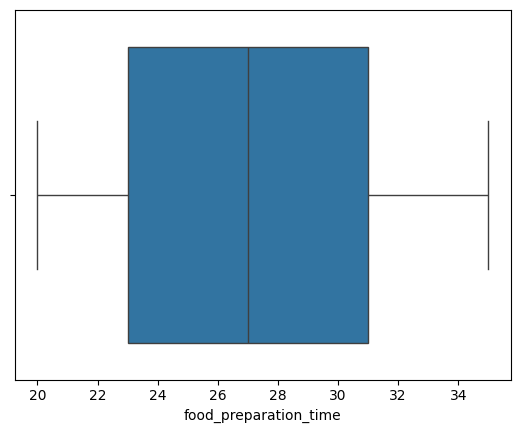

In [ ]:
sns.histplot(data=df,x='food_preparation_time') ## Histogram for the food preparation time
plt.show()
sns.boxplot(data=df,x='food_preparation_time') ## Boxplot for the food preparation time
plt.show()

Delivery Time

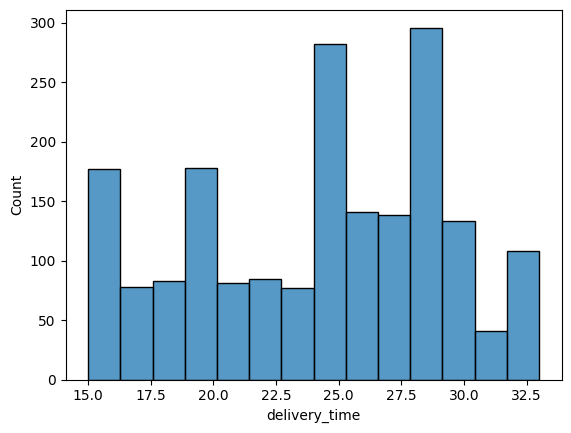

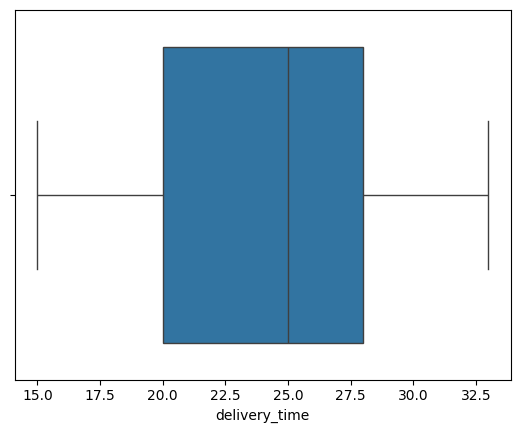

In [ ]:
sns.histplot(data=df,x='delivery_time') ## Histogram for the delivery time
plt.show()
sns.boxplot(data=df,x='delivery_time') ## Boxplot for the delivery time
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
df["restaurant_name"].value_counts()[:10].sort_values(ascending = False)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
RedFarm Broadway,59
RedFarm Hudson,55
TAO,49
Han Dynasty,46


#### Observations:
The top 5 restaurants in terms of the numer of orders received are:
* Shake Shack                  
* The Meatball Shop            
* Blue Ribbon Sushi            
* Blue Ribbon Fried Chicken     
* Parm                          

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
df_weekend = df[df['day_of_the_week'] == 'Weekend']
weekend_cuisine = df_weekend['cuisine_type'].value_counts()
print(f"Most popular cuisine on weekends: {weekend_cuisine.index[0]} with {weekend_cuisine.values[0]} orders")

Most popular cuisine on weekends: American with 415 orders


#### Observations: The most popular cuisine on the weekends is American with 415 orders.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
orders_above_20 = df[df['cost_of_the_order'] > 20].shape[0]
total_orders = df.shape[0]
percentage_above_20 = (orders_above_20 / total_orders) * 100
print(f"Orders costing more than $20: {orders_above_20}")
print(f"Total orders: {total_orders}")
print(f"Percentage of orders costing more than $20: {percentage_above_20:.2f}%")

Orders costing more than $20: 555
Total orders: 1898
Percentage of orders costing more than $20: 29.24%


#### Observations: 29.24% of the orders cost more than 20 dollars.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
mean_delivery_time = df['delivery_time'].mean()
print('Mean order delivery time is', round(mean_delivery_time, 2), 'minutes')

Mean order delivery time is 24.16 minutes


#### Observations: The mean order delivery time is 24.16 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations: The top 3 customers are:
1.   52832 - 13 orders
2.   47440 - 10 orders
3.   83287 - 9 orders




### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


**Cuisine vs Cost of Order**

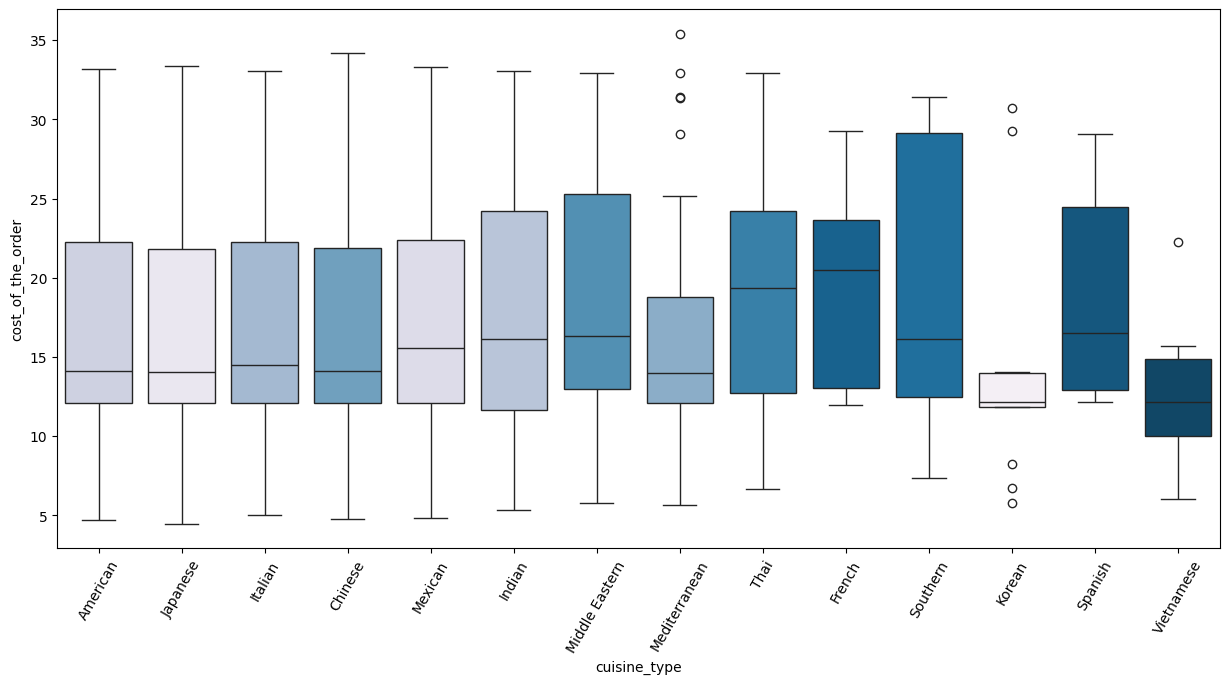

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu', hue = "cuisine_type", order = df['cuisine_type'].value_counts().index)
plt.xticks(rotation = 60)
plt.show()

**Cuisine vs Food Preparation Time**

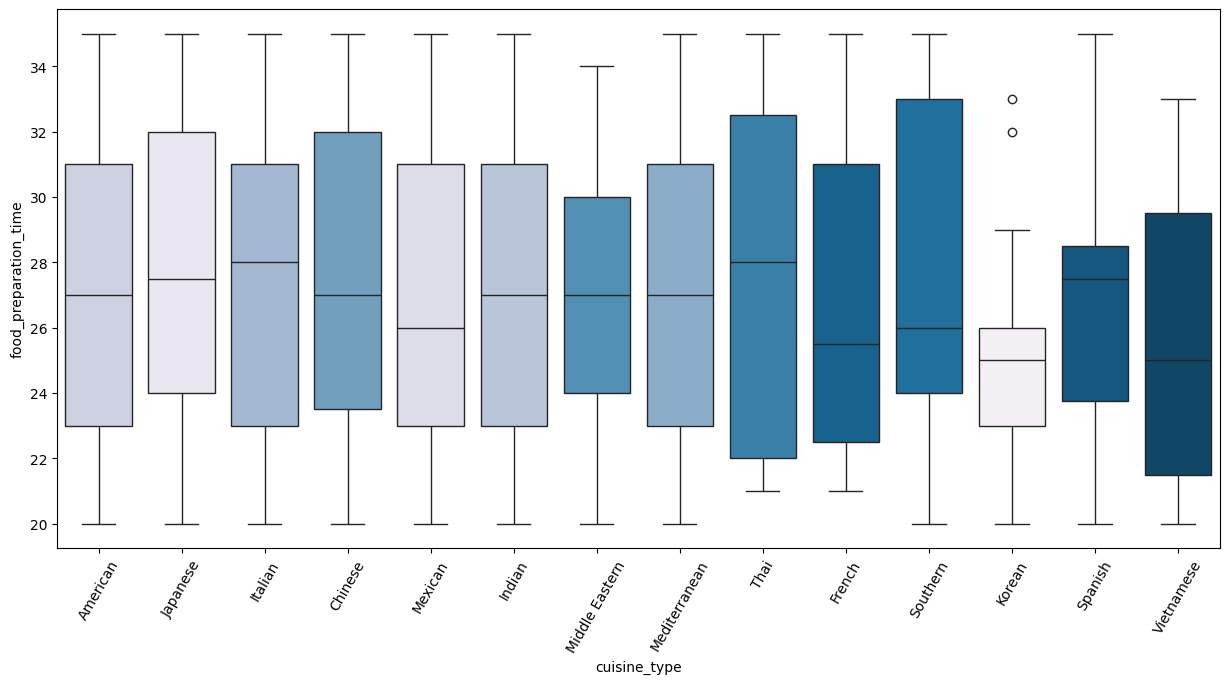

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu', hue = "cuisine_type", order = df['cuisine_type'].value_counts().index)
plt.xticks(rotation = 60)
plt.show()

**Day of the Week vs Delivery Time**

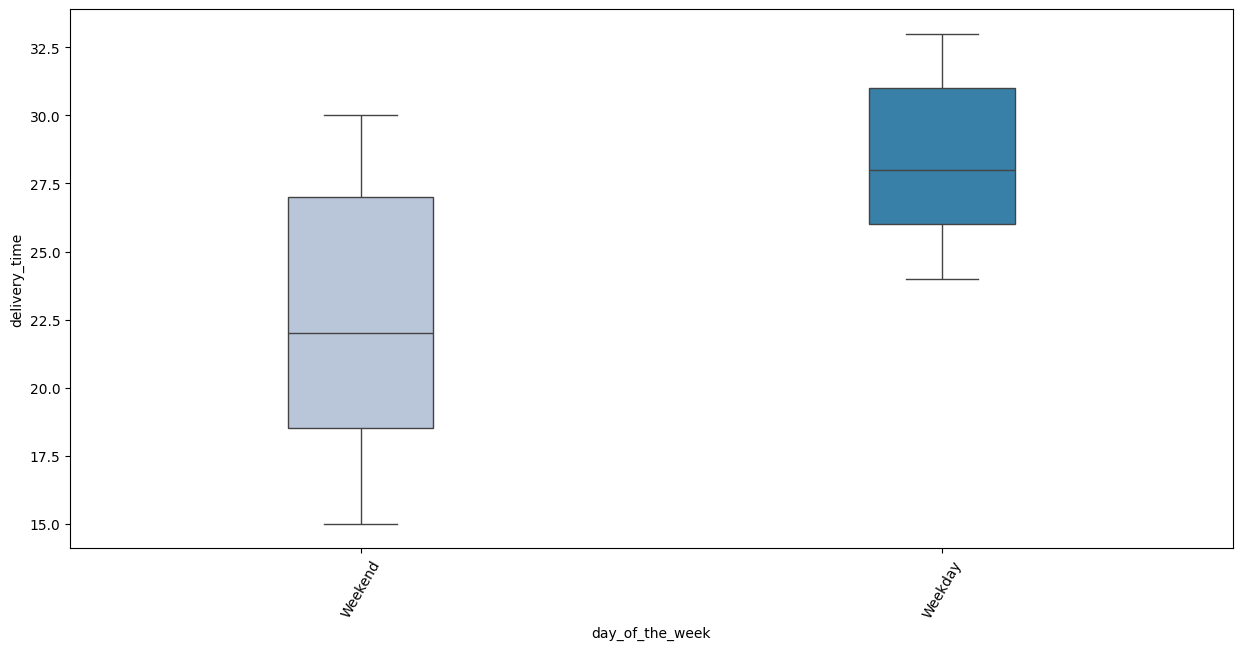

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu', hue = "day_of_the_week", order = df['day_of_the_week'].value_counts().index, width=0.25)
plt.xticks(rotation = 60)
plt.show()

**Revenue Generated by Restaurants**

In [ ]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

,cost_of_the_order
restaurant_name,
Shake Shack,3579.53
The Meatball Shop,2145.21
Blue Ribbon Sushi,1903.95
Blue Ribbon Fried Chicken,1662.29
Parm,1112.76
RedFarm Broadway,965.13
RedFarm Hudson,921.21
TAO,834.50
Han Dynasty,755.29


**Rating vs Delivery Time**

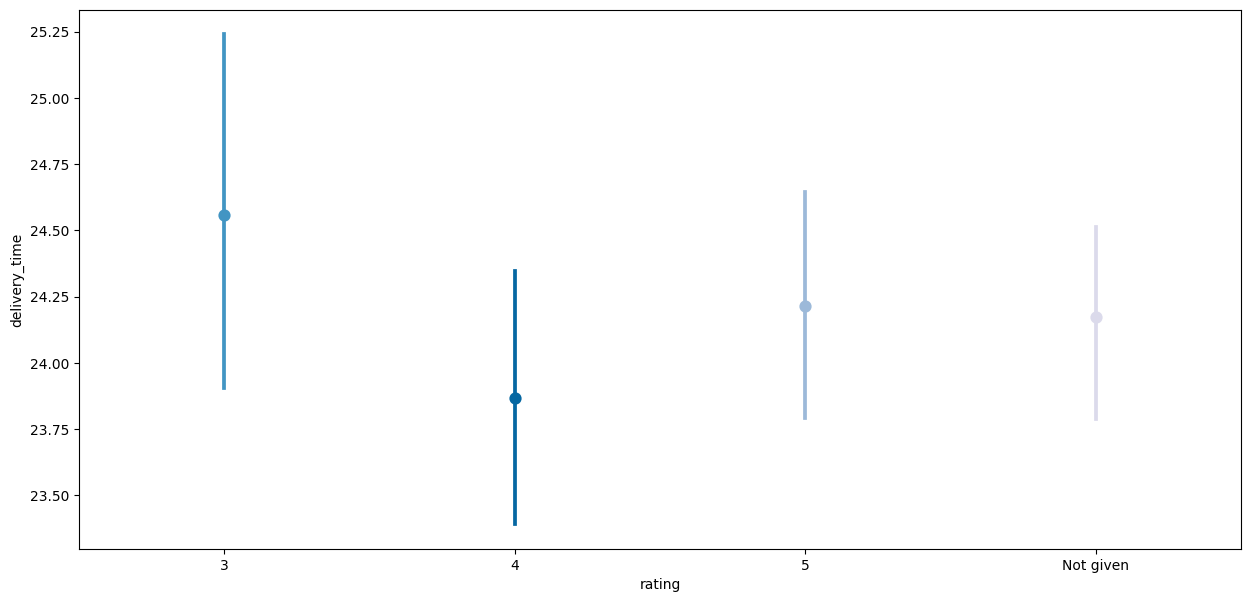

In [ ]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df, palette = 'PuBu', hue = 'rating', order = df['rating'].value_counts().index.sort_values())
plt.show()

**Rating vs Cost of Order**

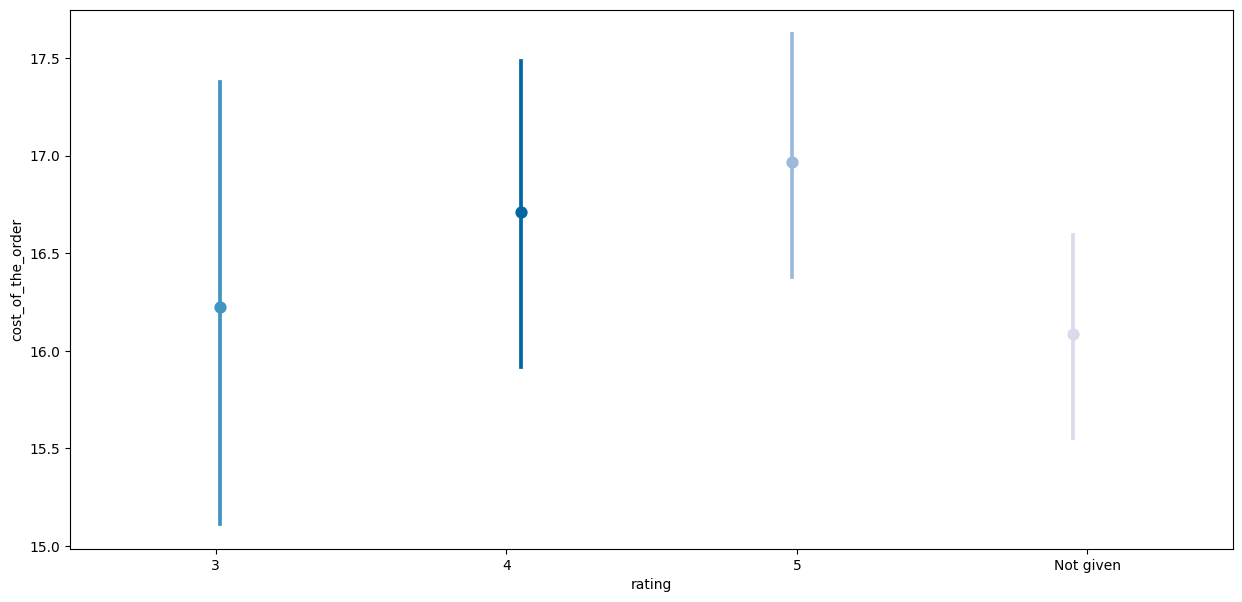

In [ ]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df, palette = 'PuBu', hue = 'rating', order = df['rating'].value_counts().index.sort_values(), dodge = True)
plt.show()

**Rating vs Food prepration Time**

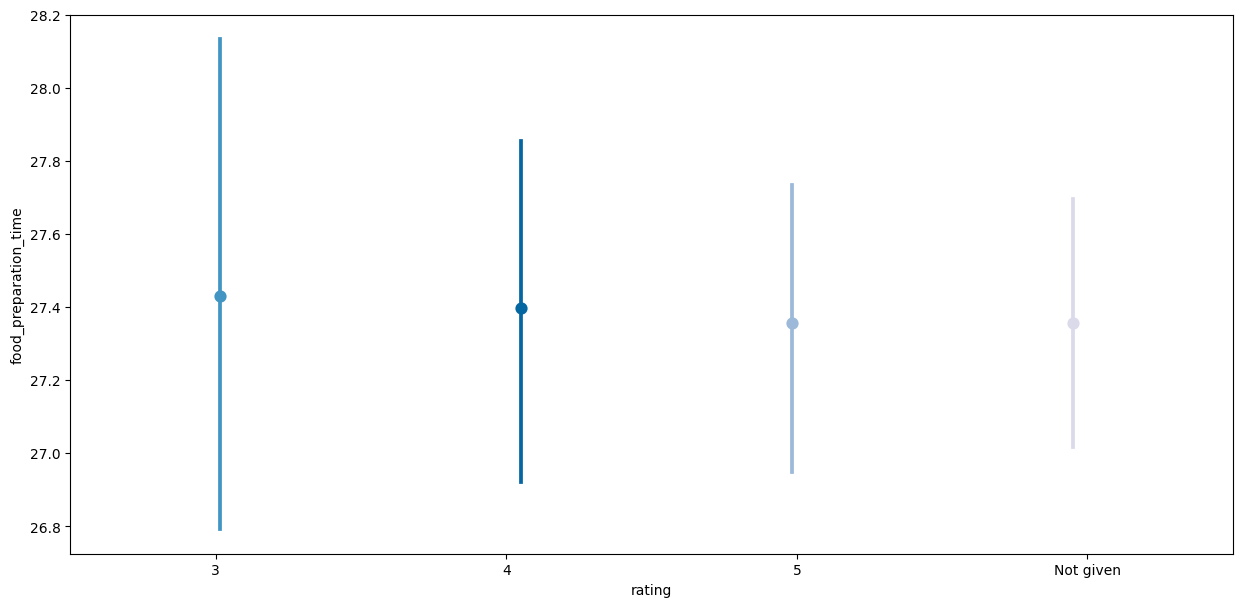

In [ ]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df, palette = 'PuBu', hue = 'rating', order = df['rating'].value_counts().index.sort_values(), dodge = True)
plt.show()

**Correlation**

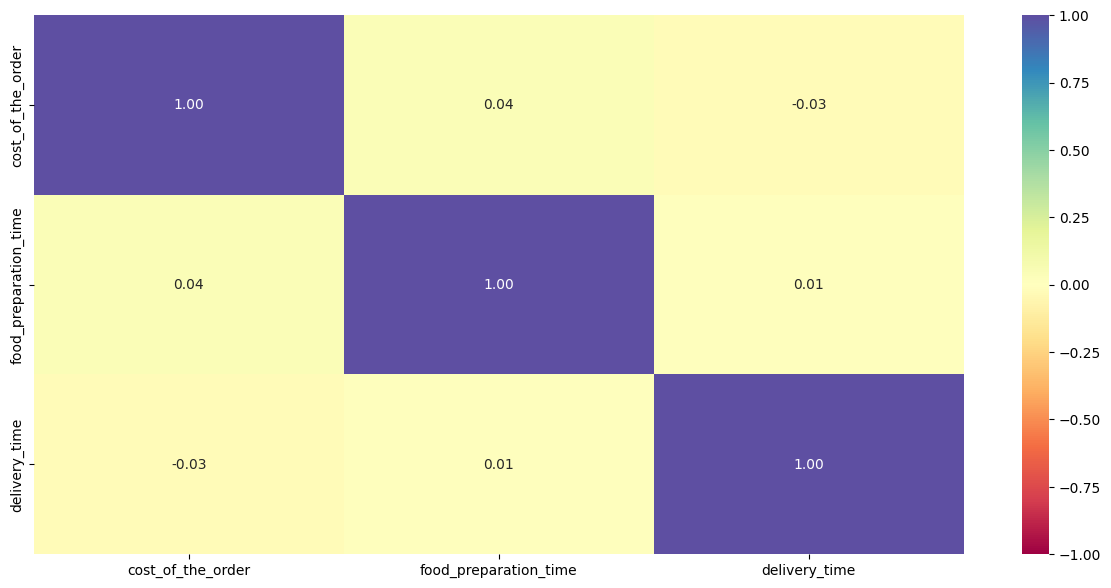

In [ ]:
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4_rating = df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() ## Complete the code to find

# Filter for average rating greater than 4
df_avg_rating_greater_than_4 = df_mean_4_rating[df_mean_4_rating['rating'] > 4].sort_values(by='rating', ascending=False).reset_index(drop=True)

df_avg_rating_greater_than_4


,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations: There are 4 restaurants that have more than 50 ratings and an average rating greater than 4. These restaurants are:

1. The Meatball Shop
2. Blue Ribbon Fried Chicken
3. Shake Shack
4. Blue Ribbon Sushi


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
def calculate_revenue(x):
  if x > 20:
    return x * 0.25
  elif x > 5:
    return x * 0.15
  else:
    return x

df['revenue'] = df['cost_of_the_order'].apply(calculate_revenue)
total_revenue = df['revenue'].sum()
print(f"The net revenue generated by the company across all orders is $",round(total_revenue, 2))

The net revenue generated by the company across all orders is $ 6209.04


#### Observations:The net revenue generated by the company across all orders is $ 6209.04


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

percentage_over_60 = df[df['total_time'] > 60].shape[0] / df.shape[0] * 100

print(f"Percentage of orders taking more than 60 minutes to deliver: {percentage_over_60:.2f}%")


Percentage of orders taking more than 60 minutes to deliver: 10.54%


#### Observations: The percentage of orders taking more than 60 minutes to deliver is 10.54%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
df.groupby('day_of_the_week')['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations: The delivery time varies by around 6 minutes. Weekdays average 28 minutes to deliver while Weekends average 22 minutes to deliver.


### **Conclusion and Recommendations**

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### **Conclusions**:
*  American and Japanese Cuisines are the most popular cuisine types.
*  Mexican and Japanese Cuisine have higher average ratings.
*  All cuisines have similar average delivary and food preperation times with some outliers, with Chinese and Mexican cuisines having less outliers.

### **Recommendations**:

*  Increasing support for high ratings but low counts of ratings (Promoting restaurants)
*  Improve customer feedback and encourage ratings to improve business strategies based off ratings, as many ratings are "Not given"